<a href="https://colab.research.google.com/github/Alexey1998-ml/contests/blob/main/shad_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://contest.yandex.ru/contest/12341/problems/

# Task A

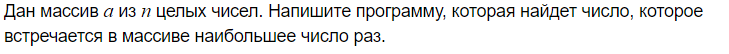

In [ ]:
counter = {}
with open('input.txt', 'r') as file:
  n = int(file.readline())
  nums = map(int, file.readline().split(' '))
for num in nums:
  if num not in counter:
    counter[num] = 0
  counter[num] += 1

max_count = 0
max_num = None
for num in counter:
  if counter[num] == max_count:
    if num > max_num:
      max_num = num
  elif counter[num] > max_count:
    max_count = counter[num]
    max_num = num
print(max_num)

# Task B

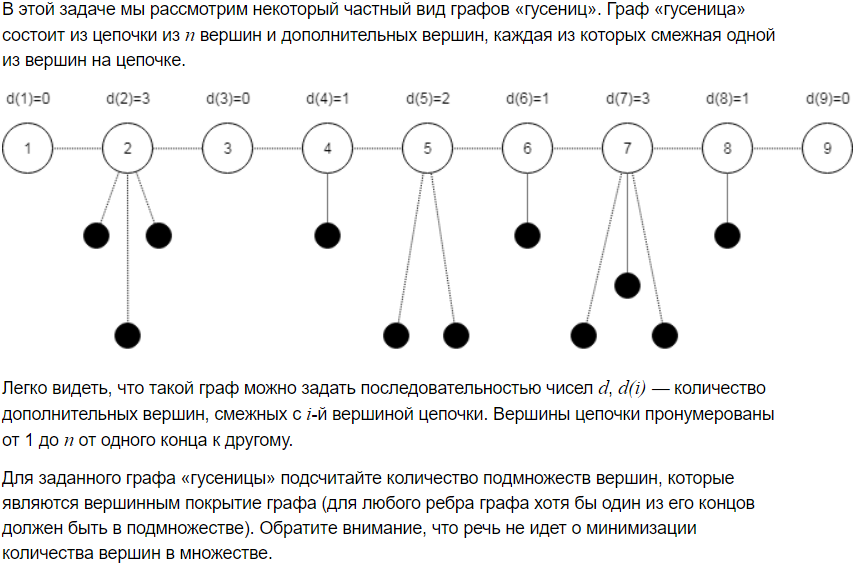

In [ ]:
n = int(input())
d = map(int, input().split())
pow_2 = [1 for _ in range(101)]
pow_2[1] = 2
for i in range(2, len(pow_2)):
  pow_2[i] = pow_2[i - 1] * 2
kmod = 1000000007
n1_previous = 1
n0_previous = 1
res = 1 << next(d)
for i in d:
  n1 = (n1_previous + n0_previous) * pow_2[i]
  n0 = n1_previous
  res = (n1 + n0) % kmod
  n1_previous = n1 % kmod
  n0_previous = n0 % kmod
print(res)

# Task C

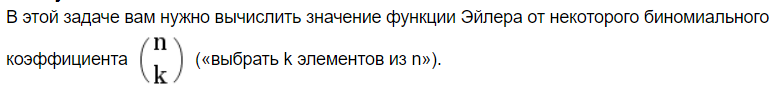

In [ ]:
import math
kn = list(map(int, input().split(' ')))
k = kn[0]
n = kn[1]

mesh_prime = [1 for _ in range(n + 1)]
for i in range(2, len(mesh_prime)):
  if mesh_prime[i] == 1:
    for j in range(2*i, len(mesh_prime), i):
      mesh_prime[j] = 0

mesh_prime_dict = {}
for i in range(2, len(mesh_prime)):
  if mesh_prime[i] == 1:
    mesh_prime_dict[i] = 0

for j in mesh_prime_dict:
  l = 1
  while j ** l <= n:
    mesh_prime_dict[j] += n // (j ** l)
    l += 1

# print(mesh_prime_dict)

for j in mesh_prime_dict:
  l = 1
  while j ** l <= n - k:
    mesh_prime_dict[j] -= (n - k) // (j ** l)
    l += 1

# print(mesh_prime_dict)

for j in mesh_prime_dict:
  l = 1
  while j ** l <= k:
    mesh_prime_dict[j] -=  k // (j ** l)
    l += 1

# print(mesh_prime_dict)

ans = 1
res = 1
for i in mesh_prime_dict:
  if mesh_prime_dict[i] != 0:
    ans *= (i ** mesh_prime_dict[i])
    res *= (i - 1) * i ** (mesh_prime_dict[i] - 1)
res %= 1000000007
print(int(res))

# Task D

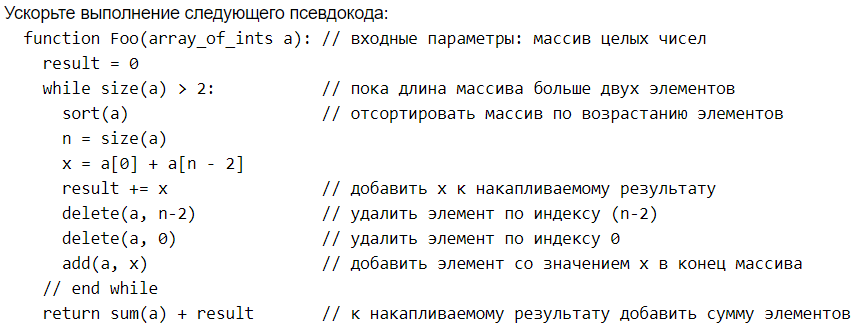

In [ ]:
n = int(input())
a = list(map(int, input().split(' ')))

def function(a):
  result = 0
  a.sort()
  l = 0
  while len(a) - l > 2:
    n = len(a)
    x = a[l] + a[n - 2]
    result += x
    l += 1
    if x > a[-1]:
      a[-2] = a[-1]
      a[-1] = x
    else:
      a[-2] = x
  return sum(a[l:]) + result

print(function(a))

# Task E

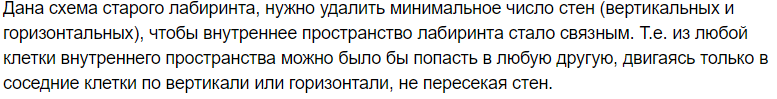

In [ ]:
import sys
sys.setrecursionlimit(1000000)
labyrinth = []
with open('input.txt', 'r') as file:
  n, m = list(map(int, file.readline().split(' ')))
  lines = 2 * n + 1
  for i in range(lines):
    # print(file.readline())
    line = list(file.readline())
    if len(line) > 0:
      if line[-1] == '\n':
        labyrinth.append(line[:-1])
      else:
        labyrinth.append(line)
    else:
      break
def dfs_marker(labyrinth, i, j):
  if labyrinth[i][j] == '.':
    labyrinth[i][j] = '#'
  else:
    return
  if i + 1 < len(labyrinth) - 1:
    dfs_marker(labyrinth, i + 1, j)
  if j + 1 < len(labyrinth[0]) - 1:
    dfs_marker(labyrinth, i, j + 1)
  if i - 1 > 0:
    dfs_marker(labyrinth, i - 1, j)
  if j - 1 > 0:
    dfs_marker(labyrinth, i, j - 1)


def check_border(labyrinth, i_new, j_new, i, j):
  return labyrinth[(i_new + i) // 2][(j_new + j) // 2] in ['+', '-', '|'] and labyrinth[i][j] == '.' and labyrinth[i_new][j_new] == '#'


def dfs_searcher(labyrinth, i, j, seen):
  if tuple([i, j]) in seen:
    return
  if i + 2 < len(labyrinth) - 1:
    i_new = i + 2
    j_new = j
    if check_border(labyrinth, i_new, j_new, i, j):
      labyrinth[(i_new + i) // 2][(j_new + j) // 2] = '#'
      return i, j
    else:
      seen.add(tuple([i + 1, j]))
      dfs_searcher(labyrinth, i + 1, j, seen)
      
  
  if j + 2 < len(labyrinth[0]) - 1:
    i_new = i
    j_new = j + 2
    if check_border(labyrinth, i_new, j_new, i, j):
      labyrinth[(i_new + i) // 2][(j_new + j) // 2] = '#'
      return i, j
    else:
      seen.add(tuple([i, j + 1]))
      dfs_searcher(labyrinth, i, j + 1, seen)
  if i - 2 > 0:
    i_new = i - 2
    j_new = j
    if check_border(labyrinth, i_new, j_new, i, j):
      labyrinth[(i_new + i) // 2][(j_new + j) // 2] = '#'
      return i, j
    else:
      seen.add(tuple([i - 1, j]))
      dfs_searcher(labyrinth, i - 1, j, seen)

  if j - 2 > 0:
    i_new = i
    j_new = j - 2
    if check_border(labyrinth, i_new, j_new, i, j):
      labyrinth[(i_new + i) // 2][(j_new + j) // 2] = '#'
      return i, j
    else:
      seen.add(tuple([i, j - 1]))
      dfs_searcher(labyrinth, i, j - 1, seen)
  return i, j


flag_start = False

for i in range(len(labyrinth)):
  for j in range(len(labyrinth[0])):
    if labyrinth[i][j] == '.':
      if flag_start:
        i_new, j_new = dfs_searcher(labyrinth, i, j, set())
        dfs_marker(labyrinth, i_new, j_new)
      else:
        dfs_marker(labyrinth, i, j)
        flag_start = True

for i in range(len(labyrinth)):
  print(''.join(labyrinth[i]).replace('#', '.'))